<h1>Forecast Store Sales</h1>

# Business Understanding
#### Operating Environment
<p>The client is a retailer operating in the pharmaceutical industry with a number of stores across the East Coast of Australia. They have recently found increased demand for Vitamin and health products and are seeking to better understand what drives demans so they can take full advantage of the increased market capacity. </p>

#### Business Goal
<p>As of late, the client has found that they are struggling with stockouts. This occurs when there is no stock left of a particular item which is in demand. This has led to lost revenue and missed opportunities for sales. As a result the client wishes to minimize the occurence of stockouts. A large part of minimizing stockouts is predicting sales accurate so that stock levels can be predictive. The formula for closing inventory is given by: </p>
    <blockquote>Closing Inventory = Opening Inventory - Today's Sales + Returns + Stock Deliveries</blockquote>
    
#### Strategy
<p>For stage one of the project, the team has decided to explore the idea of better predicting sales. Future enhancements could involve predicting product returns and using prescriptive analytics to drive stock purchases/deliveries. </p>

#### Source Data
<p>The dataset has been extract from a Planning Analytics sales cube. The finance and operations team typically use PA to plan for their stock levels and sales forecasts hence this has been chosen as the appropriate repository. </p>
   

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

# Data Understanding

<p>The CRISP-DM methodology has been followed to ensure industry agreed best practices are used. Following obtaining an understanding of the busienss the next focus is to obtain an understanding of the data available. This includes obtaining an understanding of data structures, types, data quality and relationships.</p>

In [67]:
# The code was removed by Watson Studio for sharing.

,Cube,Time Date,Version,Account,Product,Store,state,brand,store_id,OPS Sales Source,OPS Sales Measure,Value,RegionAffluence,Good Weather Impact,Brand Affinity,Product Size
0,OPS Sales,3012018,Actual,4999,2661360,QLD_CW_ST0113,QLD,CW,ST0113,Base,Amount,1224.0,0.9,Negative,10,150
1,OPS Sales,6012018,Actual,4999,2661360,QLD_CW_ST0113,QLD,CW,ST0113,Base,Amount,1836.0,0.9,Negative,10,150
2,OPS Sales,9012018,Actual,4999,2661360,QLD_CW_ST0113,QLD,CW,ST0113,Base,Amount,1224.0,0.9,Negative,10,150
3,OPS Sales,12012018,Actual,4999,2661360,QLD_CW_ST0113,QLD,CW,ST0113,Base,Amount,1224.0,0.9,Negative,10,150
4,OPS Sales,15012018,Actual,4999,2661360,QLD_CW_ST0113,QLD,CW,ST0113,Base,Amount,1683.0,0.9,Negative,10,150


### Remove Non-Essential Features

In [68]:
sales_df = df_data_1[df_data_1['Account'] != 10000001]
sales_df = df_data_1[['Time Date', 'Product','state', 'store_id','Value','RegionAffluence','Brand Affinity','Product Size']]
sales_df.columns = ['date', 'item', 'state','store','sales','affluence','affinity','size']
sales_df.head()

,date,item,state,store,sales,affluence,affinity,size
0,3012018,2661360,QLD,ST0113,1224.0,0.9,10,150
1,6012018,2661360,QLD,ST0113,1836.0,0.9,10,150
2,9012018,2661360,QLD,ST0113,1224.0,0.9,10,150
3,12012018,2661360,QLD,ST0113,1224.0,0.9,10,150
4,15012018,2661360,QLD,ST0113,1683.0,0.9,10,150


In [69]:
# format date
sales_df['date'] = sales_df['date'].apply(lambda x: '0' + str(x) if len(str(x)) < 8 else str(x))
sales_df['date'] = pd.to_datetime(sales_df['date'], format='%d%m%Y')
sales_df = sales_df.set_index(['date'])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379292 entries, 2018-01-03 to 2018-12-31
Data columns (total 7 columns):
item         379292 non-null int64
state        379292 non-null object
store        379292 non-null object
sales        379292 non-null float64
affluence    379292 non-null float64
affinity     379292 non-null int64
size         379292 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 23.2+ MB


### 1. Weekly Store Sales
Let examine weekly sales all stores.

In [70]:
# remove zeroes sales when a store is closed.
sales_df = sales_df[sales_df['sales'] > 0]

In [71]:
stores = pd.DataFrame(sales_df.groupby(['date','store']).sum()['sales']).unstack()
stores = stores.resample('7D',label='left').sum()
stores.sort_index(inplace = True)

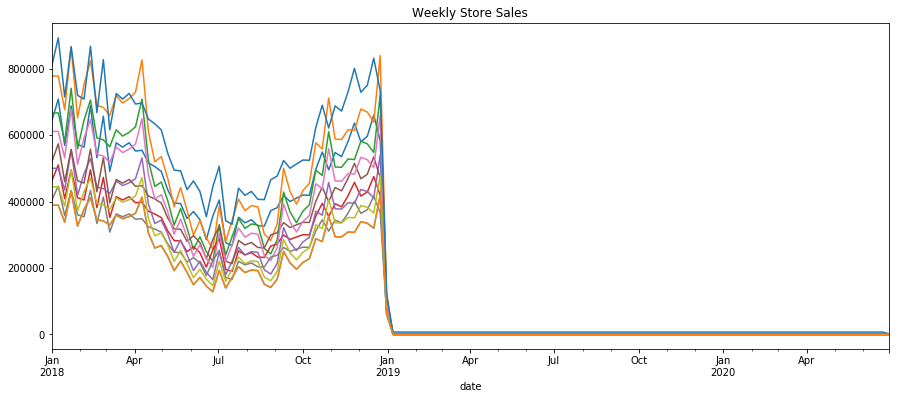

In [72]:
stores.plot(figsize=(15,6), title='Weekly Store Sales', legend=None)
plt.show()

### 2. Average Trend of Weekly Store Sales

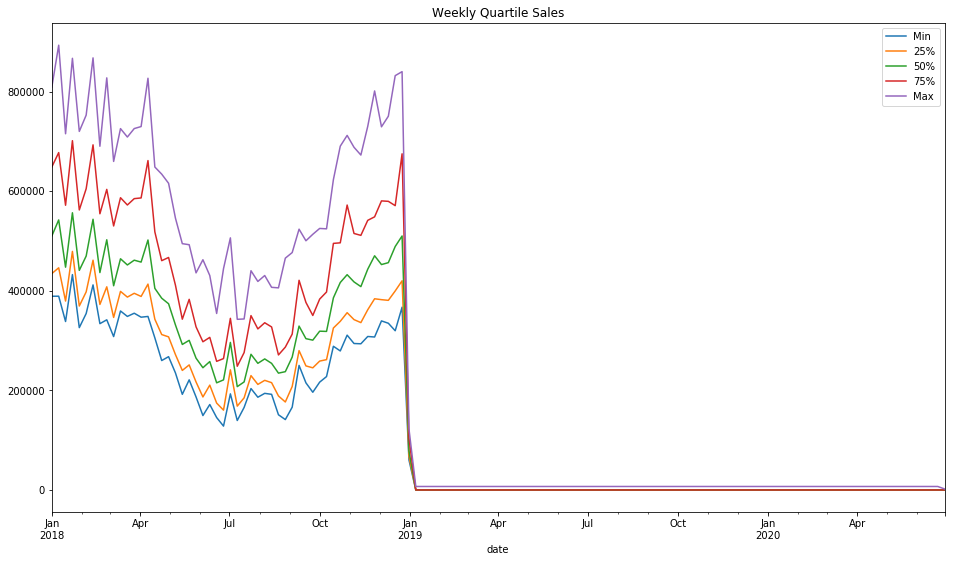

In [73]:
store_qtr = pd.DataFrame(stores.quantile([0.0,0.25,0.5,0.75,1.0],axis=1)).transpose()
store_qtr.sort_index(inplace = True)
store_qtr.columns = ['Min','25%','50%','75%','Max']
store_qtr.plot(figsize=(16,9), title='Weekly Quartile Sales')
plt.show()

### 3. Item Sales Trends

In [74]:
items = pd.DataFrame(sales_df.groupby(['date','item']).sum()['sales']).unstack()
items = items.resample('7D',label='left').sum()
items.sort_index(inplace = True)

items.tail(5)

sales                                                          \
item       2477202 2482445 2485787 2490626 2490701 2491287 2497561 2498306   
date                                                                         
2020-06-01     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-06-08     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-06-15     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-06-22     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-06-29     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                            ...                                          \
item       2498307 2511675  ... 2673107 2673114 2673119 2673126 2675163   
date                        ...                                           
2020-06-01     0.0  7000.0  ...     0.0     0.0     0.0     0.0     0.0   
2020-06-08     0.0  7000.0  ...     0.0     0.0     0.0     0.0     0.0   
2020-06-15     0.0  7000.0  ...     0.0     0.0     0.0     0.0     0.0   
2020-06-22     0.0  7000.0  ...     0.0     0.0     0.0     0.0     0.0   
2020-06-29     0.0  2000.0  ...     0.0     0.0     0.0     0.0     0.0   

                                                    
item       2679547 2679612 2683752 2683927 2684523  
date                                                
2020-06-01     0.0     0.0     0.0     0.0     0.0  
2020-06-08     0.0     0.0     0.0     0.0     0.0  
2020-06-15     0.0     0.0     0.0     0.0     0.0  
2020-06-22     0.0     0.0     0.0     0.0     0.0  
2020-06-29     0.0     0.0     0.0     0.0     0.0  

[5 rows x 69 columns]

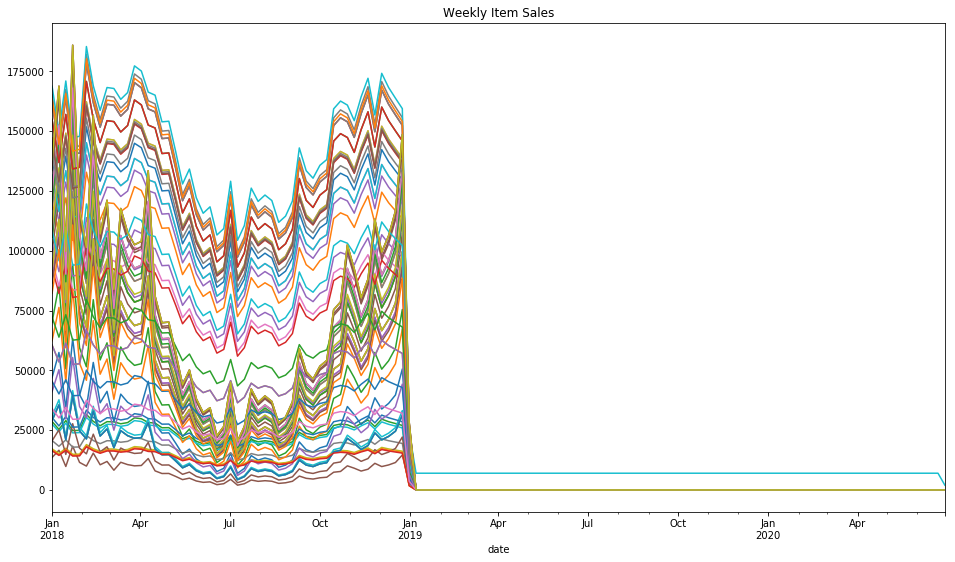

In [75]:
items.plot(figsize=(16,9), title='Weekly Item Sales', legend=None)
plt.show()

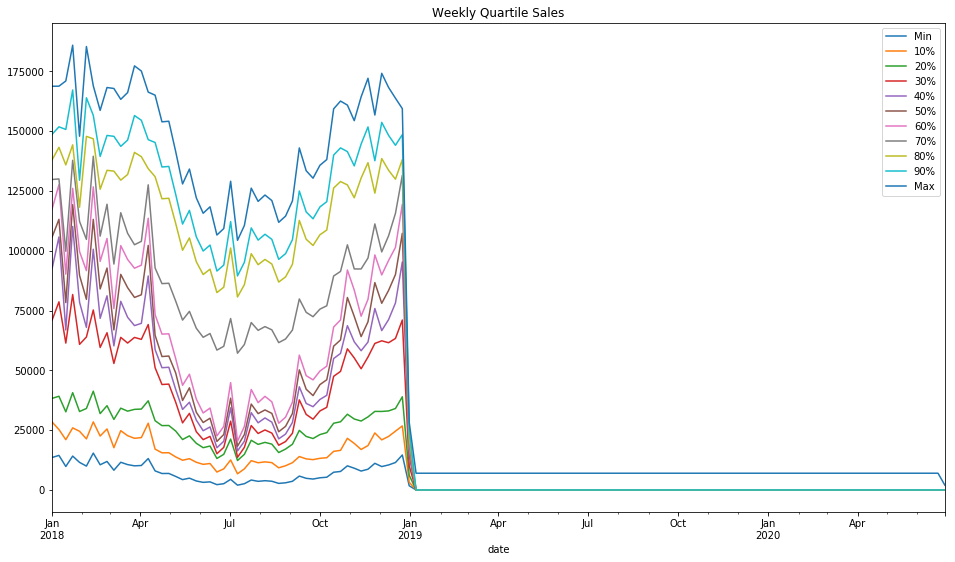

In [76]:
item_WK_qtr = pd.DataFrame(items.quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],axis=1)).transpose()
item_WK_qtr.sort_index(inplace = True)
item_WK_qtr.columns = ['Min','10%','20%','30%','40%','50%','60%','70%','80%','90%','Max']
item_WK_qtr.plot(figsize=(16,9), title='Weekly Quartile Sales')
plt.show()

### 4. Store & Item Variability

We've seen how stores and items trend by themselves, but do some stores sell more of one item? In other words: do the stores have the same sales mix? Are the items sold evenly (percentage-wise) across all stores?

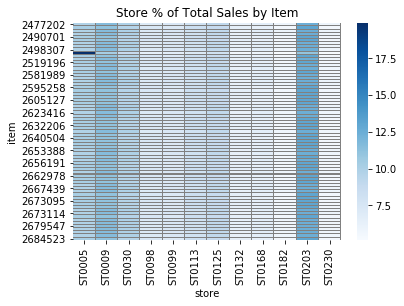

In [77]:
store_item = sales_df.groupby(by=['item','store']).sum()['sales'].groupby(level=0).apply(
    lambda x: 100* x/ x.sum()).unstack()
sns.heatmap(store_item, cmap='Blues', linewidths=0.01, linecolor='gray').set_title(
    'Store % of Total Sales by Item')
plt.show()

The plot above shows the % distribution of each item's sales across the stores (each row adds to 100%). As we can see, it's very uniform. 
The key takeaway here is that the items are sold evenly across the stores.
Now to confirm, let's look at the % distribution of each store's sales across the different items (each row adds to 100%).

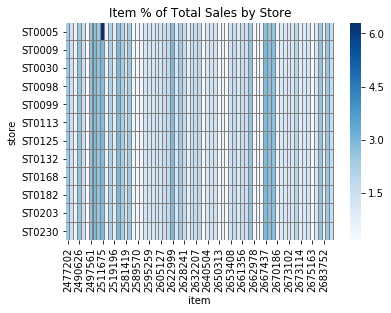

In [78]:
item_store = sales_df.groupby(by=['store','item']).sum()['sales'].groupby(level=0).apply(
    lambda x: 100* x/ x.sum()).unstack()
sns.heatmap(item_store , cmap='Blues', linewidths=0.01, linecolor='gray').set_title(
    'Item % of Total Sales by Store')
plt.show()

### 5. Day of Week Variability

How do sales vary by day of week? Is there seasonality as well? Do stores share same trends?

In [79]:
sales_df['Day'] = sales_df.index.weekday_name
sales_df.head()

,item,state,store,sales,affluence,affinity,size,Day
date,,,,,,,,
2018-01-03,2661360,QLD,ST0113,1224.0,0.9,10,150,Wednesday
2018-01-06,2661360,QLD,ST0113,1836.0,0.9,10,150,Saturday
2018-01-09,2661360,QLD,ST0113,1224.0,0.9,10,150,Tuesday
2018-01-12,2661360,QLD,ST0113,1224.0,0.9,10,150,Friday
2018-01-15,2661360,QLD,ST0113,1683.0,0.9,10,150,Monday


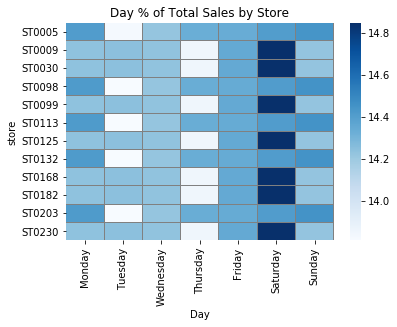

In [80]:
dow_store = sales_df.groupby(['store','Day']).sum()['sales'].groupby(level=0).apply(
    lambda x: 100* x/ x.sum()).unstack().loc[:,['Monday',
                                                'Tuesday',
                                                'Wednesday',
                                                'Thursday',
                                                'Friday',
                                                'Saturday',
                                                'Sunday']]
sns.heatmap(dow_store, cmap='Blues', linewidths=0.01, linecolor='gray').set_title(
    'Day % of Total Sales by Store')
plt.show()

The plot above shows the % mix of store sales by day. We can see that the stores are very similar in what days are popular, esp. NSW stores on Saturday.
Let's do the same for the items.

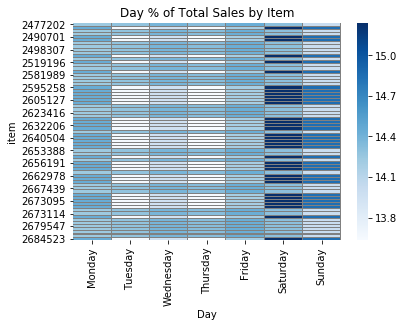

In [81]:
dow_item = sales_df.groupby(['item','Day']).sum()['sales'].groupby(level=0).apply(
    lambda x: 100* x/ x.sum()).unstack().loc[:,['Monday',
                                                'Tuesday',
                                                'Wednesday',
                                                'Thursday',
                                                'Friday',
                                                'Saturday',
                                                'Sunday']]
sns.heatmap(dow_item, cmap='Blues', linewidths=0.01, linecolor='gray').set_title(
    'Day % of Total Sales by Item')
plt.show()

In [82]:
dow = pd.DataFrame(sales_df.groupby(['date','Day']).sum()['sales']).unstack()['sales'].loc[:,
                                                                                ['Monday',
                                                                               'Tuesday',
                                                                               'Wednesday',
                                                                               'Thursday',
                                                                               'Friday',
                                                                               'Saturday',
                                                                               'Sunday']]
dow = dow.resample('7D',label='left').sum()
dow.sort_index(inplace = True)


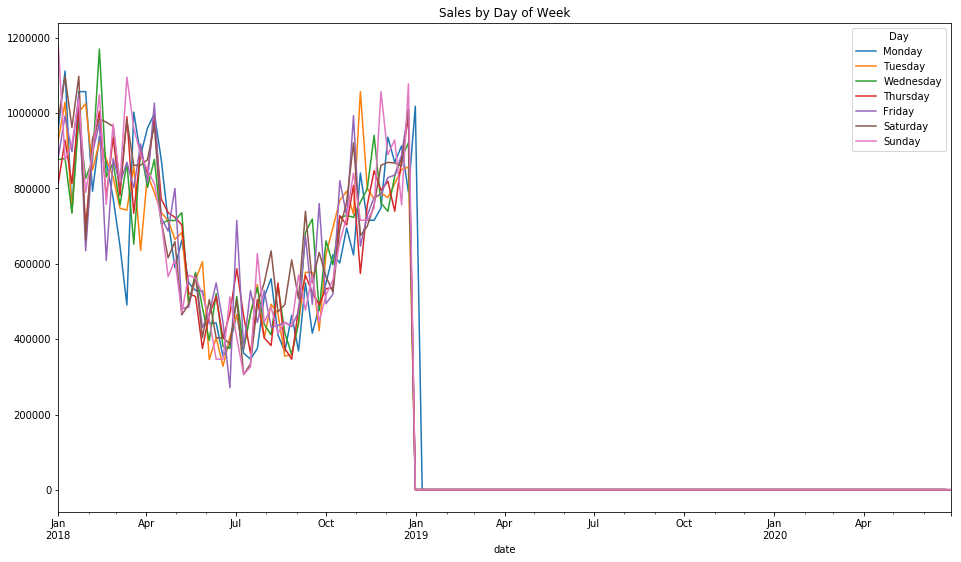

In [83]:
dow.plot(figsize=(16,9), title='Sales by Day of Week')
plt.show()

Day of week does impact sales, most stores & items have similar distributions. Day of week trends follow general weekly trend.

### Add Date Features

In [84]:
def add_feat(df, train_end_str):
    dataf = df
    
    dataf['Weekday'] = dataf.index.dayofweek
    dataf['Is_Mon'] = (dataf.index.dayofweek == 0) *1
    dataf['Is_Tue'] = (dataf.index.dayofweek == 1) *1
    dataf['Is_Wed'] = (dataf.index.dayofweek == 2) *1
    dataf['Is_Thu'] = (dataf.index.dayofweek == 3) *1
    dataf['Is_Fri'] = (dataf.index.dayofweek == 4) *1
    dataf['Is_Sat'] = (dataf.index.dayofweek == 5) *1
    dataf['Is_Sun'] = (dataf.index.dayofweek == 6) *1
    dataf['Is_wknd'] = dataf.index.dayofweek // 4 # Fri-Sun are 4-6, Monday is 0 so this is valid
    #dataf['Day_Num'] = ((dataf.index - start_date)/ ns_per_day).astype(int)
    
    #dataf['Month'] = dataf.index.month
    #dataf['Day_of_Year'] = ((dataf.index - start_date)/ ns_per_day).astype(int) % 364
    #dataf['Year'] = ((dataf.index - start_date)/ ns_per_day).astype(int) // 364 -1
    #dataf['Day_of_Quarter'] = ((dataf.index - start_date)/ ns_per_day).astype(int) % 91
    #dataf['Quarter'] = (((dataf.index - start_date)/ ns_per_day).astype(int) // 91) % 4
    dataf.reset_index(inplace=True)
    
    # Add item quartile as feature
    #dataf = dataf.merge(itm_quart, on='item').drop('item_metric', axis=1)

    # Add prior year sales as additional feature
    #prior_year_sales = dataf[['date','sales','store','item']]
    #prior_year_sales['date'] += pd.Timedelta('364 days')
    #prior_year_sales.columns =['date','lag_12mo','store','item']

    #dataf = dataf.merge(prior_year_sales, on=['date','store','item'])
    
    # Add average by item by store by day of year as additional feature
    #avg = dataf.loc[df['date'] < pd.to_datetime(train_end_str), ['Day_of_Year','sales','store','item']].groupby(by=['Day_of_Year','store','item']).mean().reset_index()
    #avg.columns =['Day_of_Year','store','item','DoY_Mean']
    
    #dataf = dataf.merge(avg, on=['Day_of_Year','store','item'])
    
    # Add average by day of week by quarter by item by store as additional feature
    #avg = dataf.loc[df['date'] < pd.to_datetime(train_end_str), ['Quarter','Weekday','sales','store','item']].groupby(by=['Quarter','Weekday','store','item']).mean().reset_index()
    #avg.columns =['Quarter','Weekday','store','item','DoW_Mean']
    
    #dataf = dataf.merge(avg, on=['Quarter','Weekday','store','item'])
    
    # Id's start at 0 instead of 1
    #dataf['store'] -=1
    #dataf['item'] -=1
    
    # Remove first year of data as there is no prior year sales for them, then sort to match competition id's
    #dataf = dataf[dataf['Year'] >=0].drop('Year', axis=1).sort_values(['item','store','date'])
    
    return dataf

In [85]:
# Set cutoff time for time series data holdout
datetime_col = 'date'
target_col = 'sales'
cutoff_time = '2018-10-01'
start_date = pd.to_datetime('January 1, 2018')
ns_per_day = 86400000000000

In [86]:
input_data = add_feat(sales_df, 'December 31 2018') 
input_data.tail(3)

,date,item,state,store,sales,affluence,affinity,size,Day,Weekday,Is_Mon,Is_Tue,Is_Wed,Is_Thu,Is_Fri,Is_Sat,Is_Sun,Is_wknd
301974,2018-12-25,2497561,QLD,ST0005,1975.05,1.1,9,50,Tuesday,1,0,1,0,0,0,0,0,0
301975,2018-12-28,2497561,QLD,ST0005,2257.20,1.1,9,50,Friday,4,0,0,0,0,1,0,0,1
301976,2018-12-31,2497561,QLD,ST0005,1504.80,1.1,9,50,Monday,0,1,0,0,0,0,0,0,0


In [87]:
# Remove empty rows and drop non-essential columns for modelling
input_data = input_data[(input_data.store != 0) & (input_data.item !=0)]
model_features = input_data.drop(['Day','Weekday','state'], axis=1)
#input_data[['DoY_Mean','DoW_Mean']] = \
#input_data[['DoY_Mean','DoW_Mean']].astype(int)
#input_data.dtypes

In [88]:
from sklearn.preprocessing import LabelEncoder

le_store = LabelEncoder().fit( model_features["store"] )
print( "le_store:" )
print( np.sort( np.array( [ le_store.transform(le_store.classes_), le_store.classes_ ] ).T, axis=0 ) )

le_store:
[[0 'ST0005']
 [1 'ST0009']
 [2 'ST0030']
 [3 'ST0098']
 [4 'ST0099']
 [5 'ST0113']
 [6 'ST0125']
 [7 'ST0132']
 [8 'ST0168']
 [9 'ST0182']
 [10 'ST0203']
 [11 'ST0230']]


In [89]:
model_features["store"] = le_store.transform( model_features["store"] )

In [90]:
# Reorder the columns to match with XGB model features
model_features = model_features[['item','sales','store','affluence','affinity','size','Is_Fri','Is_Mon','Is_Sat','Is_Sun','Is_Thu','Is_Tue','Is_Wed','Is_wknd','date']]
model_features.tail(3)

,item,sales,store,affluence,affinity,size,Is_Fri,Is_Mon,Is_Sat,Is_Sun,Is_Thu,Is_Tue,Is_Wed,Is_wknd,date
301974,2497561,1975.05,0,1.1,9,50,0,0,0,0,0,1,0,0,2018-12-25
301975,2497561,2257.20,0,1.1,9,50,1,0,0,0,0,0,0,1,2018-12-28
301976,2497561,1504.80,0,1.1,9,50,0,1,0,0,0,0,0,0,2018-12-31


# Modelling

In [91]:
X_train = model_features.loc[model_features[datetime_col] < cutoff_time]
y_train = model_features.loc[model_features[datetime_col] < cutoff_time, target_col]

# Drop datetime column but save it for later
train_dates = X_train[datetime_col]
X_train = X_train.drop(['sales','date'], axis=1)


X_test = model_features.loc[model_features[datetime_col] >= cutoff_time]
y_test = model_features.loc[model_features[datetime_col] >= cutoff_time, target_col]

test_dates = X_test[datetime_col]
X_test = X_test.drop(['sales','date'], axis=1)

In [92]:
from IPython.display import display

print('X_train:')
display(X_train.iloc[np.r_[0:3, -3:0]])

print('y_train:')
display(y_train.iloc[np.r_[0:3, -3:0]])

print('X_test:')
display(X_test.iloc[np.r_[0:3, -3:0]])

print('y_test:')
display(y_test.iloc[np.r_[0:3, -3:0]])

X_train:


,item,store,affluence,affinity,size,Is_Fri,Is_Mon,Is_Sat,Is_Sun,Is_Thu,Is_Tue,Is_Wed,Is_wknd
0,2661360,5,0.9,10,150,0,0,0,0,0,0,1,0
1,2661360,5,0.9,10,150,0,0,1,0,0,0,0,1
2,2661360,5,0.9,10,150,0,0,0,0,0,1,0,0
301943,2497561,0,1.1,9,50,0,0,0,1,0,0,0,1
301944,2497561,0,1.1,9,50,0,0,0,0,0,0,1,0
301945,2497561,0,1.1,9,50,0,0,1,0,0,0,0,1


y_train:


0         1224.00000
1         1836.00000
2         1224.00000
301943    1692.90000
301944    1658.53413
301945    1842.81570
Name: sales, dtype: float64

X_test:


,item,store,affluence,affinity,size,Is_Fri,Is_Mon,Is_Sat,Is_Sun,Is_Thu,Is_Tue,Is_Wed,Is_wknd
89,2661360,5,0.9,10,150,0,1,0,0,0,0,0,0
90,2661360,5,0.9,10,150,0,0,0,0,1,0,0,0
91,2661360,5,0.9,10,150,0,0,0,1,0,0,0,1
301974,2497561,0,1.1,9,50,0,0,0,0,0,1,0,0
301975,2497561,0,1.1,9,50,1,0,0,0,0,0,0,1
301976,2497561,0,1.1,9,50,0,1,0,0,0,0,0,0


y_test:


89        1300.50
90        1377.00
91        1453.50
301974    1975.05
301975    2257.20
301976    1504.80
Name: sales, dtype: float64

## Train XGBoost Model


### Grid Search Cross-Valdation with Gradient Boosting Regressor

User Action: Set the tuned_parameters used by Grid Search Cross-Validation

Conducts exhaustive search over specified parameter values for XGBRegressor

Displays cross-validation log and resulting GridSearchCV object


In [93]:
tuned_parameters = {
    'n_estimators': [100, 300], 
    'learning_rate': [0.10, 0.30],
 #    'n_estimators': [100, 150, 200, 250, 300], 
#  'learning_rate': [0.10, 0.15, 0.20, 0.25, 0.30],
}

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

clf = GridSearchCV(estimator = XGBRegressor(), param_grid = tuned_parameters, cv=2, iid=False, n_jobs=-1)
# to see output during run, add:, verbose=2

clf.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': [100, 300], 'learning_rate': [0.1, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Print Best Parameters from Grid Search

In [94]:
best_params = clf.best_params_
best_params

{'learning_rate': 0.1, 'n_estimators': 100}

In [95]:
best_model = clf.best_estimator_
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [96]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('xgb', best_model)])

In [97]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('xgb', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [98]:
y_pred_np = best_model.predict(X_test)

# Convert numpy array to pandas series
y_pred = pd.Series(y_pred_np, index=y_test.index, name=target_col+'_pred')

# Print
print(y_pred.name+':')
y_pred.head()

sales_pred:


89    1268.744873
90    1268.744873
91    1278.011353
92    1268.744873
93    1285.329224
Name: sales_pred, dtype: float32

In [99]:
output_dataset_path = 'Store_Sales_Predictions.csv'

real_pred_values = pd.concat([test_dates, y_test, y_pred], axis=1)
real_pred_values.to_csv(output_dataset_path)
real_pred_values.head()

,date,sales,sales_pred
89,2018-10-01,1300.5000,1268.744873
90,2018-10-04,1377.0000,1268.744873
91,2018-10-07,1453.5000,1278.011353
92,2018-10-10,1518.3720,1268.744873
93,2018-10-13,1158.4854,1285.329224


In [100]:
from sklearn.metrics import mean_squared_error
print("Root Mean Square Error of the model prediction is: ", round((mean_squared_error(y_test, y_pred))**0.5, 1))

Root Mean Square Error of the model prediction is:  366.4


In [101]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute Percentage Error of the model prediction is: {}%".format(round(mean_absolute_percentage_error(y_test, y_pred),1)))

Mean Absolute Percentage Error of the model prediction is: 27.0%


In [102]:
date_real_pred_values = real_pred_values.copy()
date_real_pred_values = date_real_pred_values.set_index('date')
date_real_pred_values['Date'] = date_real_pred_values.index.date
daily_values = date_real_pred_values.groupby(['Date'], as_index=False).mean().set_index('Date')
daily_values.head()

,sales,sales_pred
Date,,
2018-10-01,662.630733,785.722778
2018-10-02,755.344521,785.858337
2018-10-03,797.241130,785.858337
2018-10-04,644.275609,785.858337
2018-10-05,596.198147,793.161133


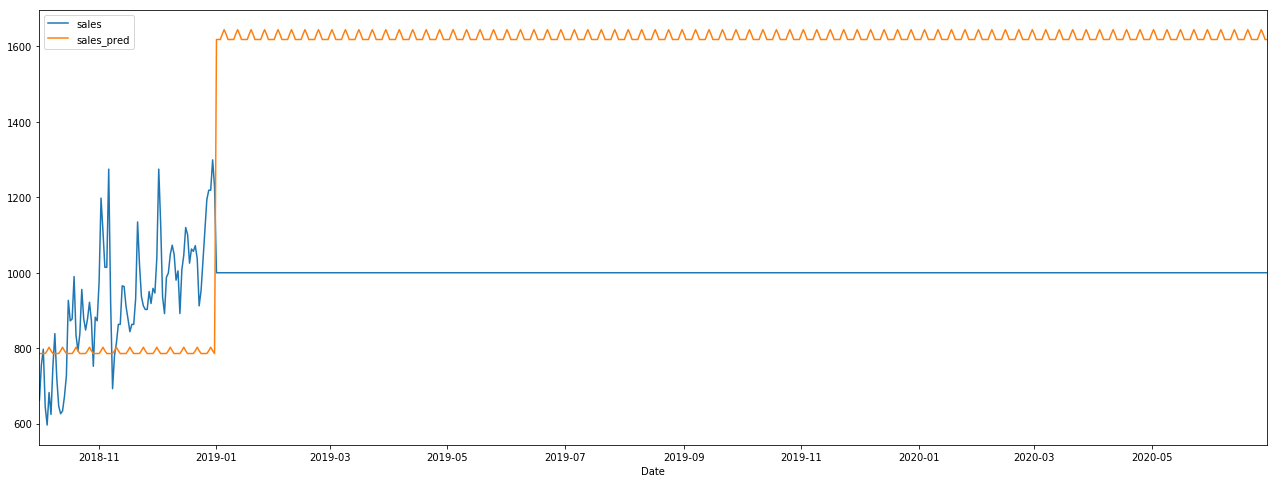

In [103]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 22, 8

daily_values.plot()

## Add weather data

In [104]:

body = client_82bf73abc4c74fc3ac0d798fd9b236cd.get_object(Bucket='retaildemo-donotdelete-pr-3fbwqevyiizznj',Key='Weather.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()



,Date,NSW Temp Avg,NSW Precipitation,VIC Temp Avg,VIC Precipitation,QLD Temp Avg,QLD Precipitation
0,1012018,23,0.00,20,0.0,27,0.00
1,2012018,24,3.05,19,0.0,26,3.05
2,3012018,21,0.51,17,0.0,26,0.00
3,4012018,21,0.00,18,0.0,23,0.00
4,5012018,22,0.00,21,0.0,25,0.00


### Add weather variables into model features

In [105]:
weather = df_data_3
weather['Date'] = weather['Date'].apply(lambda x: '0' + str(x) if len(str(x)) <8 else x)
weather['Date'] = pd.to_datetime(weather['Date'], format='%d%m%Y')

In [106]:
weathernsw = weather[['Date', 'NSW Temp Avg', 'NSW Precipitation']]
weathernsw['State'] = 'NSW'
weathernsw.columns = ['Date', 'Temp', 'Preciptation', 'State']

weathervic = weather[['Date', 'VIC Temp Avg', 'VIC Precipitation']]
weathervic['State'] = 'VIC'
weathervic.columns = ['Date', 'Temp', 'Preciptation', 'State']

weatherqld = weather[['Date', 'QLD Temp Avg', 'QLD Precipitation']]
weatherqld['State'] = 'QLD'
weatherqld.columns = ['Date', 'Temp', 'Preciptation', 'State']

In [107]:
weather_df =pd.concat([weathernsw, weathervic, weatherqld])

In [108]:
model_features = pd.merge(input_data,
                 weather_df,
                 left_on=['state', 'date'], right_on=['State', 'Date'], 
                 how='left')

In [109]:
model_features.head()

,date,item,state,store,sales,affluence,affinity,size,Day,Weekday,...,Is_Wed,Is_Thu,Is_Fri,Is_Sat,Is_Sun,Is_wknd,Date,Temp,Preciptation,State
0,2018-01-03,2661360,QLD,ST0113,1224.0,0.9,10,150,Wednesday,2,...,1,0,0,0,0,0,2018-01-03,26.0,0.0,QLD
1,2018-01-06,2661360,QLD,ST0113,1836.0,0.9,10,150,Saturday,5,...,0,0,0,1,0,1,2018-01-06,24.0,0.0,QLD
2,2018-01-09,2661360,QLD,ST0113,1224.0,0.9,10,150,Tuesday,1,...,0,0,0,0,0,0,2018-01-09,26.0,0.0,QLD
3,2018-01-12,2661360,QLD,ST0113,1224.0,0.9,10,150,Friday,4,...,0,0,1,0,0,1,2018-01-12,26.0,0.0,QLD
4,2018-01-15,2661360,QLD,ST0113,1683.0,0.9,10,150,Monday,0,...,0,0,0,0,0,0,2018-01-15,22.0,0.0,QLD


In [110]:
model_features = model_features.drop(['state','Date','State','Day','Weekday'], axis=1)
model_features["store"] = le_store.transform( model_features["store"] )

In [111]:
# Reorder the columns to match with XGB model features
model_features = model_features[['item','store','affluence','affinity','size','Is_Fri','Is_Mon','Is_Sat','Is_Sun','Is_Thu','Is_Tue','Is_Wed','Is_wknd','Temp','Preciptation','sales','date']]
model_features.tail(3)

,item,store,affluence,affinity,size,Is_Fri,Is_Mon,Is_Sat,Is_Sun,Is_Thu,Is_Tue,Is_Wed,Is_wknd,Temp,Preciptation,sales,date
301974,2497561,0,1.1,9,50,0,0,0,0,0,1,0,0,21.0,0.0,1975.05,2018-12-25
301975,2497561,0,1.1,9,50,1,0,0,0,0,0,0,1,24.0,0.0,2257.20,2018-12-28
301976,2497561,0,1.1,9,50,0,1,0,0,0,0,0,0,26.0,0.0,1504.80,2018-12-31


In [112]:
model_features.head()

,item,store,affluence,affinity,size,Is_Fri,Is_Mon,Is_Sat,Is_Sun,Is_Thu,Is_Tue,Is_Wed,Is_wknd,Temp,Preciptation,sales,date
0,2661360,5,0.9,10,150,0,0,0,0,0,0,1,0,26.0,0.0,1224.0,2018-01-03
1,2661360,5,0.9,10,150,0,0,1,0,0,0,0,1,24.0,0.0,1836.0,2018-01-06
2,2661360,5,0.9,10,150,0,0,0,0,0,1,0,0,26.0,0.0,1224.0,2018-01-09
3,2661360,5,0.9,10,150,1,0,0,0,0,0,0,1,26.0,0.0,1224.0,2018-01-12
4,2661360,5,0.9,10,150,0,1,0,0,0,0,0,0,22.0,0.0,1683.0,2018-01-15


In [113]:
X_train = model_features.loc[model_features[datetime_col] < cutoff_time]
y_train = model_features.loc[model_features[datetime_col] < cutoff_time, target_col]

# Drop datetime column but save it for later
train_dates = X_train[datetime_col]
X_train = X_train.drop(['sales','date'], axis=1)


X_test = model_features.loc[model_features[datetime_col] >= cutoff_time]
y_test = model_features.loc[model_features[datetime_col] >= cutoff_time, target_col]

test_dates = X_test[datetime_col]
X_test = X_test.drop(['sales','date'], axis=1)

In [114]:
print('X_train:')
display(X_train.iloc[np.r_[0:3, -3:0]])

print('y_train:')
display(y_train.iloc[np.r_[0:3, -3:0]])

print('X_test:')
display(X_test.iloc[np.r_[0:3, -3:0]])

print('y_test:')
display(y_test.iloc[np.r_[0:3, -3:0]])

X_train:


,item,store,affluence,affinity,size,Is_Fri,Is_Mon,Is_Sat,Is_Sun,Is_Thu,Is_Tue,Is_Wed,Is_wknd,Temp,Preciptation
0,2661360,5,0.9,10,150,0,0,0,0,0,0,1,0,26.0,0.00
1,2661360,5,0.9,10,150,0,0,1,0,0,0,0,1,24.0,0.00
2,2661360,5,0.9,10,150,0,0,0,0,0,1,0,0,26.0,0.00
301943,2497561,0,1.1,9,50,0,0,0,1,0,0,0,1,18.0,0.00
301944,2497561,0,1.1,9,50,0,0,0,0,0,0,1,0,18.0,2.03
301945,2497561,0,1.1,9,50,0,0,1,0,0,0,0,1,20.0,2.03


y_train:


0         1224.00000
1         1836.00000
2         1224.00000
301943    1692.90000
301944    1658.53413
301945    1842.81570
Name: sales, dtype: float64

X_test:


,item,store,affluence,affinity,size,Is_Fri,Is_Mon,Is_Sat,Is_Sun,Is_Thu,Is_Tue,Is_Wed,Is_wknd,Temp,Preciptation
89,2661360,5,0.9,10,150,0,1,0,0,0,0,0,0,17.0,0.0
90,2661360,5,0.9,10,150,0,0,0,0,1,0,0,0,18.0,0.0
91,2661360,5,0.9,10,150,0,0,0,1,0,0,0,1,19.0,0.0
301974,2497561,0,1.1,9,50,0,0,0,0,0,1,0,0,21.0,0.0
301975,2497561,0,1.1,9,50,1,0,0,0,0,0,0,1,24.0,0.0
301976,2497561,0,1.1,9,50,0,1,0,0,0,0,0,0,26.0,0.0


y_test:


89        1300.50
90        1377.00
91        1453.50
301974    1975.05
301975    2257.20
301976    1504.80
Name: sales, dtype: float64

In [115]:
tuned_parameters = {
    'n_estimators': [100, 300], 
    'learning_rate': [0.10, 0.30],
 #    'n_estimators': [100, 150, 200, 250, 300], 
#  'learning_rate': [0.10, 0.15, 0.20, 0.25, 0.30],
}

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

clf1 = GridSearchCV(estimator = XGBRegressor(), param_grid = tuned_parameters, cv=2, iid=False, n_jobs=-1)
# to see output during run, add:, verbose=2

clf1.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': [100, 300], 'learning_rate': [0.1, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [116]:
best_params1 = clf1.best_params_
best_params1

{'learning_rate': 0.1, 'n_estimators': 100}

In [117]:
best_model1 = clf1.best_estimator_
best_model1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [118]:
pipeline1 = Pipeline(steps=[('xgb', best_model1)])

In [119]:
pipeline1.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('xgb', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [120]:
y_pred_np = best_model1.predict(X_test)

# Convert numpy array to pandas series
y_pred = pd.Series(y_pred_np, index=y_test.index, name=target_col+'_pred')

# Print
print(y_pred.name+':')
y_pred.head()

sales_pred:


89    1150.985962
90    1223.997070
91    1281.283203
92    1311.136963
93    1037.478149
Name: sales_pred, dtype: float32

In [121]:
from sklearn.metrics import mean_squared_error
print("Root Mean Square Error of the model prediction is: ", round((mean_squared_error(y_test, y_pred))**0.5, 1))

Root Mean Square Error of the model prediction is:  241.0


In [122]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute Percentage Error of the model prediction is: {}%".format(round(mean_absolute_percentage_error(y_test, y_pred),1)))

Mean Absolute Percentage Error of the model prediction is: 25.5%


# Model Evaluation
Based on the varying training runs:
- Forecast Model without Weather: Test Root Mean Square Error of the model prediction is:  366.6, Mean Absolute Percentage Error of the model prediction is: 27.1%
- Forecast Model with    Weather: Test Root Mean Square Error of the model prediction is:  241.0, Mean Absolute Percentage Error of the model prediction is: 25.5%

The model with weather factor improves the accuracy. Next we will operationalise the model with Watson Machine Learning model.

In [123]:
# The code was removed by Watson Studio for sharing.

In [124]:
MODEL_NAME = "StoreSalesForecast"
DEPLOYMENT_NAME = "StoreSalesForecast"

In [125]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
import json

wml_client = WatsonMachineLearningAPIClient(WML_CREDENTIALS)

In [126]:
model_deployment_ids = wml_client.deployments.get_uids()
for deployment_id in model_deployment_ids:
    deployment = wml_client.deployments.get_details(deployment_id)
    model_id = deployment['entity']['deployable_asset']['guid']
    if deployment['entity']['name'] == DEPLOYMENT_NAME:
        print('Deleting deployment id', deployment_id)
        wml_client.deployments.delete(deployment_id)
        print('Deleting model id', model_id)
        wml_client.repository.delete(model_id)
wml_client.repository.list_models()

Deleting deployment id 4d3af109-d923-4b6a-b67a-87caf58eb77c
Deleting model id e7481deb-23ba-4afe-b64e-584aaa379114
------------------------------------  ---------------------------  ------------------------  -----------------
GUID                                  NAME                         CREATED                   FRAMEWORK
ece29eca-0ed4-487b-add5-657f35724324  SalesForecast                2019-08-13T04:01:52.600Z  scikit-learn-0.20
0ff3422f-64b0-4f76-95e6-286a198cd551  ChipSnackSalesForecastModel  2019-08-13T03:51:42.726Z  mllib-2.3
ed9d8ae3-bff8-47e0-89f6-7c993801cff2  GermanCreditRiskModel        2019-07-29T22:46:56.029Z  mllib-2.3
------------------------------------  ---------------------------  ------------------------  -----------------


In [127]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: "{}".format(MODEL_NAME)
    }

In [128]:
wml_models = wml_client.repository.get_details()
model_uid = None
for model_in in wml_models['models']['resources']:
    if MODEL_NAME == model_in['entity']['name']:
        model_uid = model_in['metadata']['guid']
        break

if model_uid is None:
    print("Storing model ...")

    published_model_details = wml_client.repository.store_model(model=best_model, meta_props=model_props, training_data=X_train, training_target=y_train, pipeline=pipeline)
    model_uid = wml_client.repository.get_model_uid(published_model_details)
    print("Done")

Storing model ...
Done


In [129]:
wml_deployments = wml_client.deployments.get_details()
deployment_uid = None
for deployment in wml_deployments['resources']:
    if DEPLOYMENT_NAME == deployment['entity']['name']:
        deployment_uid = deployment['metadata']['guid']
        break

if deployment_uid is None:
    print("Deploying model...")

    deployment = wml_client.deployments.create(artifact_uid=model_uid, name=DEPLOYMENT_NAME, asynchronous=False)
    deployment_uid = wml_client.deployments.get_uid(deployment)
    
print("Model id: {}".format(model_uid))
print("Deployment id: {}".format(deployment_uid))

Deploying model...


#######################################################################################

Synchronous deployment creation for uid: '3def0e42-259b-4141-a064-3c5df081b7b5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c70d1246-564d-44d5-aeec-bb85293ae8cf'
------------------------------------------------------------------------------------------------


Model id: 3def0e42-259b-4141-a064-3c5df081b7b5
Deployment id: c70d1246-564d-44d5-aeec-bb85293ae8cf
